<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [1]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


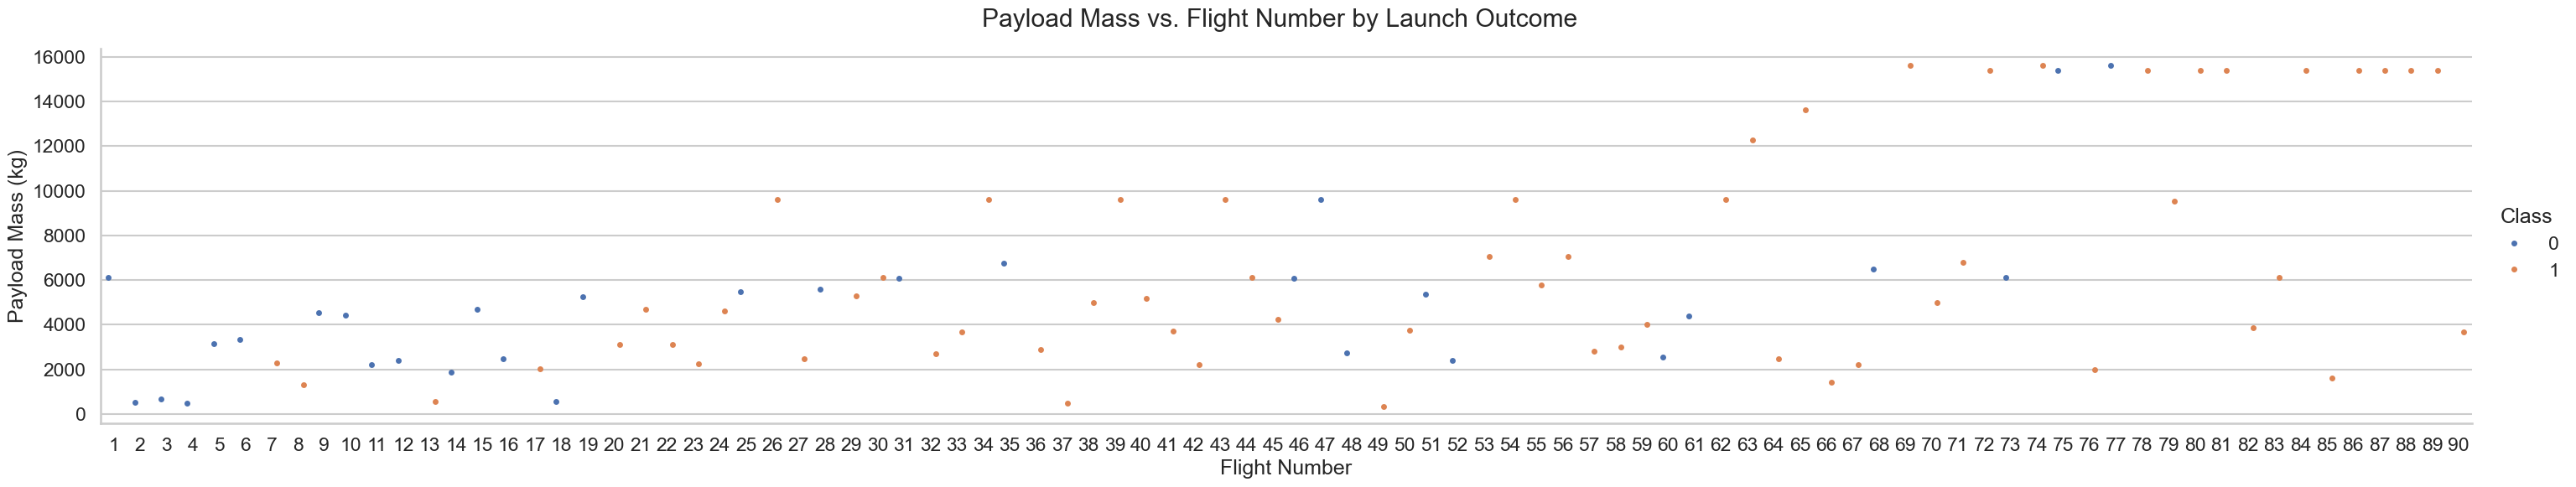

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", palette="deep")
g = sns.catplot(
    data=df,
    x="FlightNumber",
    y="PayloadMass",
    hue="Class",
    kind="strip",
    aspect=5,
    height=6,
    dodge=True
)
g.set_axis_labels("Flight Number", "Payload Mass (kg)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Payload Mass vs. Flight Number by Launch Outcome")
plt.show()


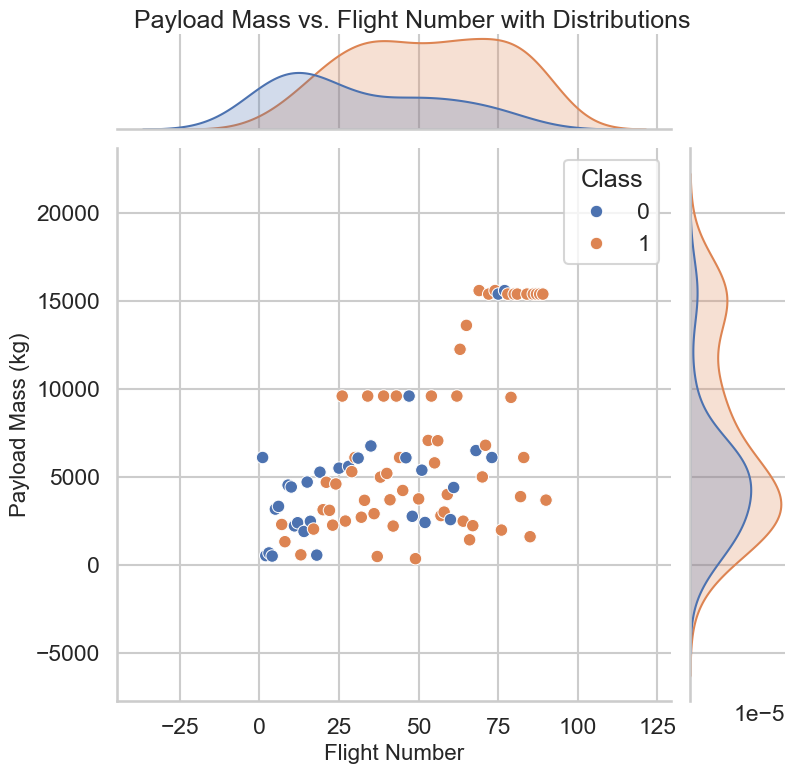

In [45]:
sns.set(style="whitegrid", context="talk", palette="deep")
g = sns.jointplot(
    data=df,
    x="FlightNumber",
    y="PayloadMass",
    hue="Class",
    kind="scatter", 
    marginal_kws={'fill': True}, 
    height=8,  
)
g.set_axis_labels("Flight Number", "Payload Mass (kg)", fontsize=16)
g.fig.suptitle("Payload Mass vs. Flight Number with Distributions", fontsize=18)
g.fig.subplots_adjust(top=0.95)

plt.show()


C:\Users\amero\AppData\Local\Temp\ipykernel_23068\1122073653.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.ax.set_yticklabels(g.ax.get_yticks(), fontsize=14)


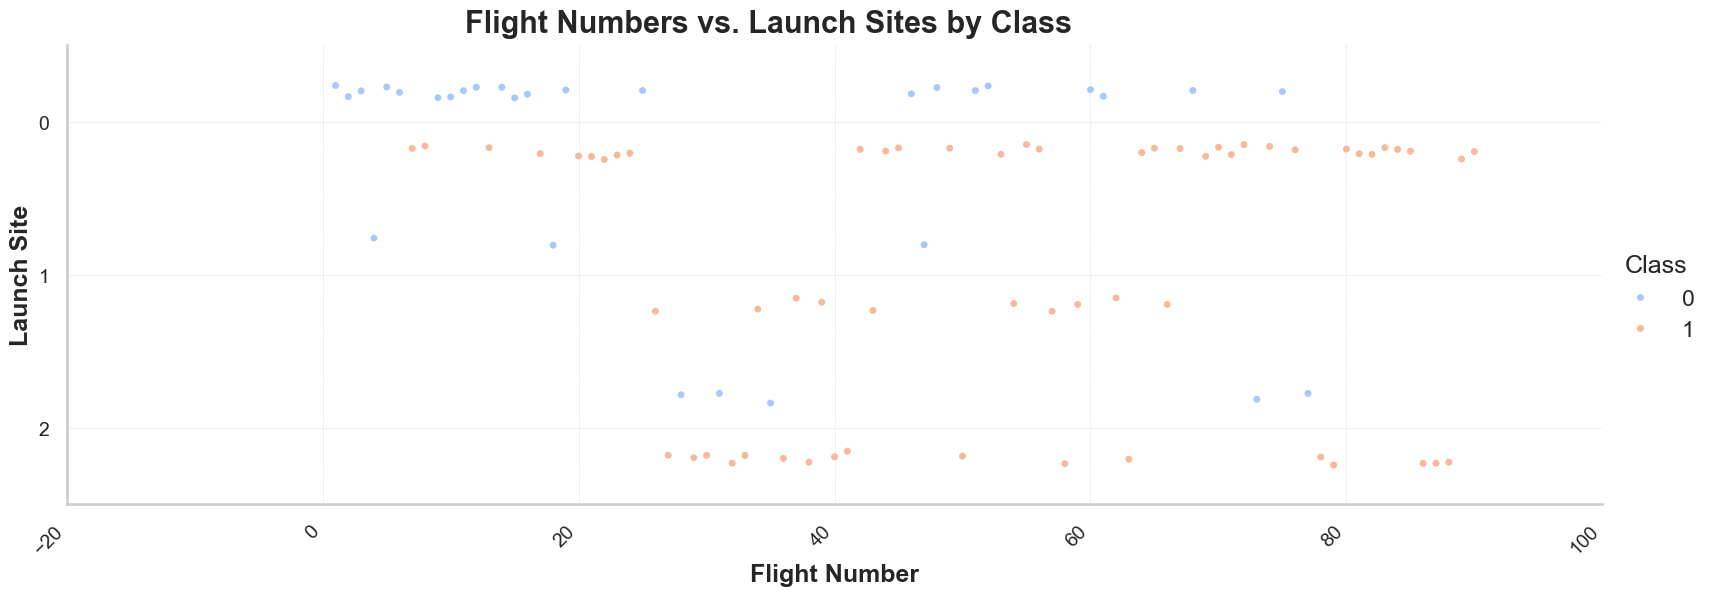

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


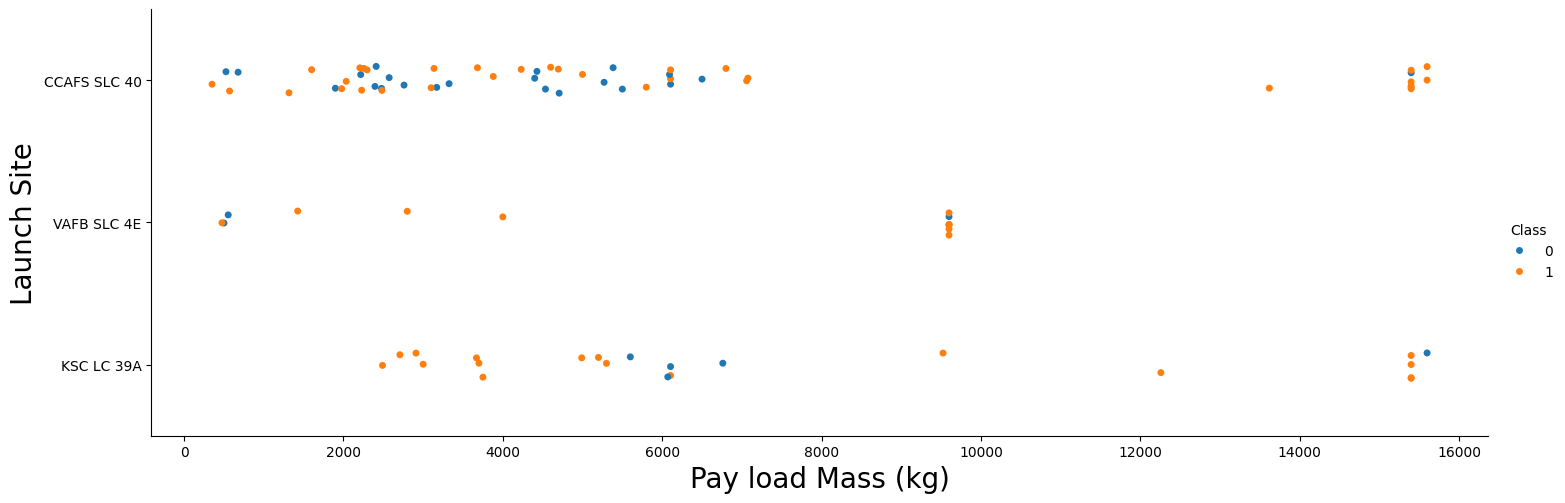

In [5]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 3) 
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

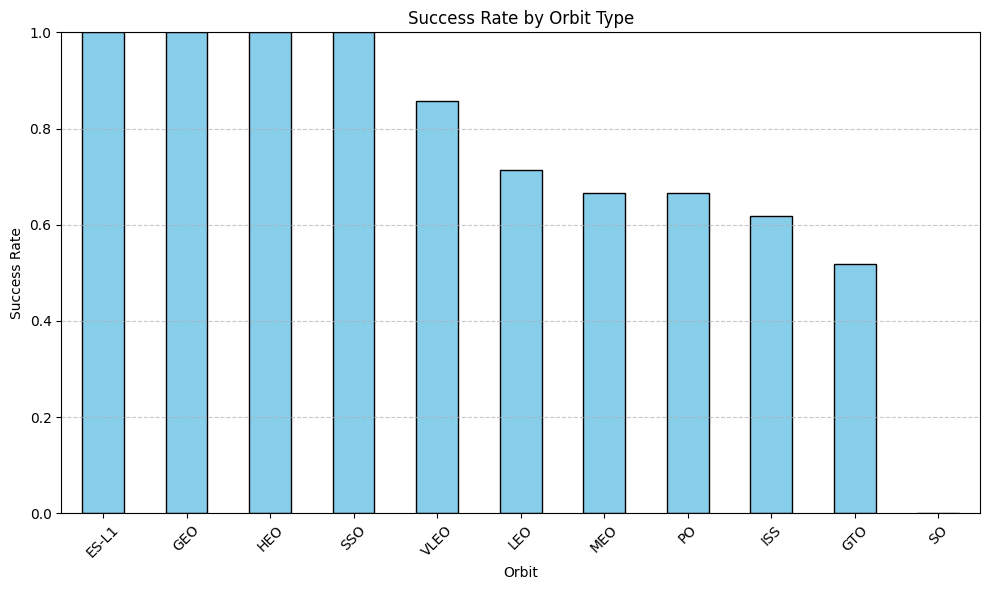

In [ ]:

orbit_success_rate = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
orbit_success_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Because success rate is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### TASK  4: Visualization


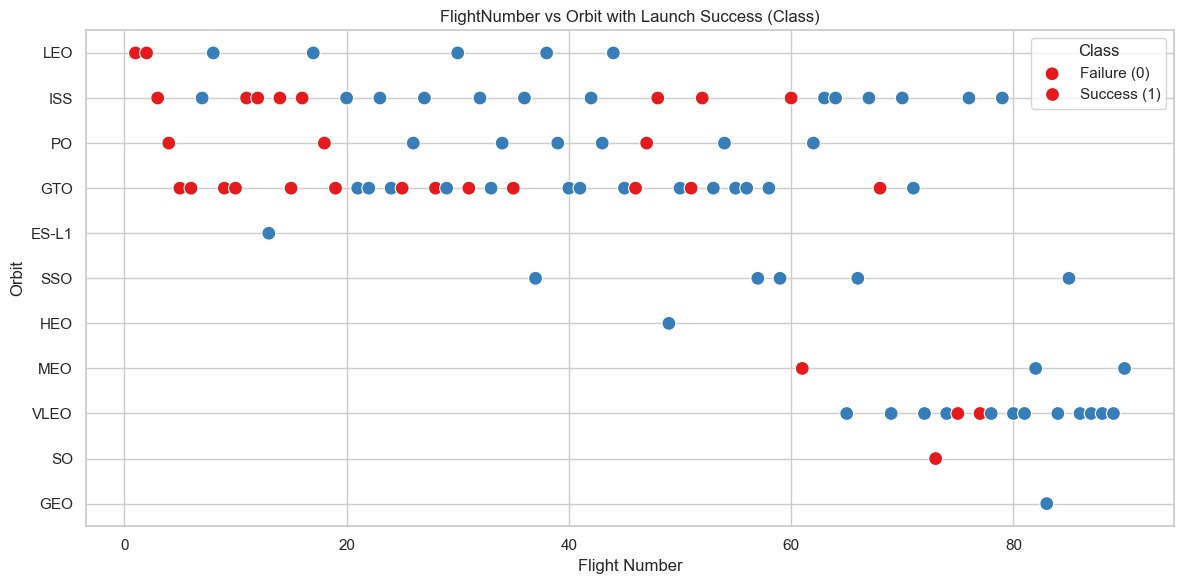

In [7]:

sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class', palette='Set1', s=100)

# Customize plot
plt.title('FlightNumber vs Orbit with Launch Success (Class)')
plt.xlabel('Flight Number')
plt.ylabel('Orbit')
plt.legend(title='Class', labels=['Failure (0)', 'Success (1)'])
plt.tight_layout()
plt.show()


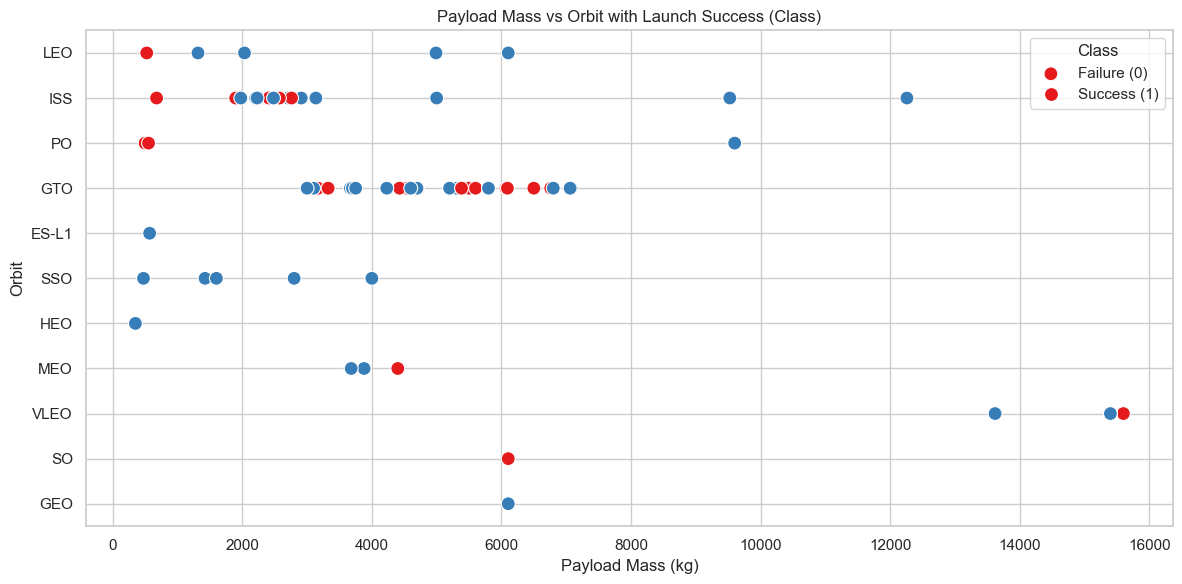

In [8]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value

sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class', palette='Set1', s=100)

# Customize plot
plt.title('Payload Mass vs Orbit with Launch Success (Class)')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Orbit')
plt.legend(title='Class', labels=['Failure (0)', 'Success (1)'])
plt.tight_layout()
plt.show()


In [9]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

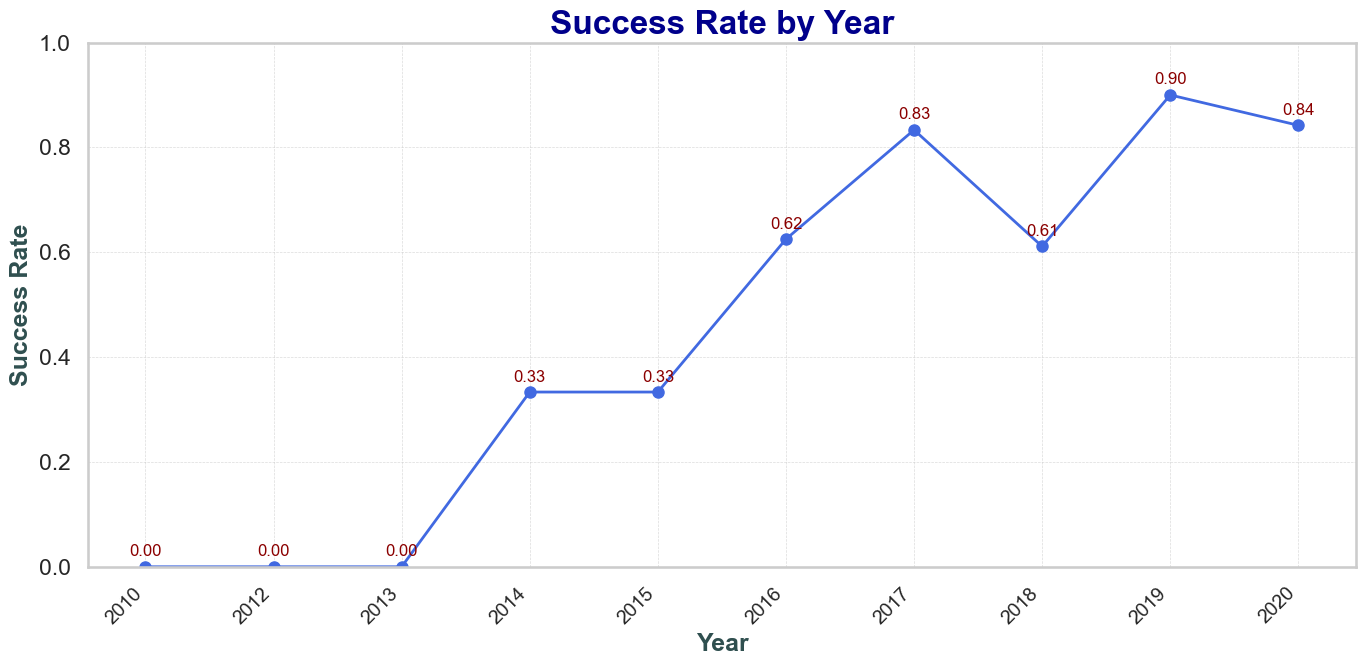

In [46]:
df['Year'] = df['Date'].apply(lambda x: x.split('-')[0])

yearly_success_rate = df.groupby('Year')['Class'].mean()

plt.figure(figsize=(14, 7))

plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8, label="Success Rate")

plt.title('Success Rate by Year', fontsize=24, fontweight='bold', color='darkblue')

plt.xlabel('Year', fontsize=18, fontweight='bold', color='darkslategray')
plt.ylabel('Success Rate', fontsize=18, fontweight='bold', color='darkslategray')

plt.ylim(0, 1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(rotation=45, fontsize=14, ha='right')

for i in range(len(yearly_success_rate)):
    plt.text(yearly_success_rate.index[i], yearly_success_rate.values[i] + 0.02, 
             f"{yearly_success_rate.values[i]:.2f}", ha='center', fontsize=12, color='darkred')

plt.tight_layout()

plt.show()

## Features Engineering 


In [11]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


 ### TASK  7: Create dummy variables to categorical columns


In [12]:
# HINT: Use get_dummies() function on the categorical columns

# Apply one-hot encoding to the specified categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Display the first few rows
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# HINT: use astype function

# Cast all columns to float64
features_one_hot = features_one_hot.astype('float64')

# Optional: Confirm the data types
features_one_hot.dtypes.head()

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
dtype: object

In [14]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


Copyright © 2020 IBM Corporation. All rights reserved.


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |
